In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import joblib
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
!pip install pandas --upgrade
from sklearn.pipeline import Pipeline

In [54]:
# Load the contents of our "best-models.joblib" file into a variable called "loaded_joblib"
loaded_joblib = joblib.load("C:/Users/aharo/OneDrive/Documents/GitHub/Prediction-of-Product-Sales/Data/best_models.joblib")

In [59]:
# Extracting the objects from the loaded joblib dictionary
preprocessor_no_scaling = loaded_joblib['preprocessor']
X_train_no_scaling = loaded_joblib['X_train']
X_test_no_scaling = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
lr = loaded_joblib['LinearRegression']
rfr = loaded_joblib['RandomForestRegressor']

# Explaining our tree-based model with SHAP

In [63]:
import shap

# Sample a subset of the training data 
X_shap = shap.sample(X_train_no_scaling, 100)
y_shap = y_train.iloc[X_shap.index]

In [61]:
# Create a TreeExplainer for the RandomForestRegressor
explainer = shap.TreeExplainer(rfr)

In [64]:
# Calculate SHAP values
shap_values = explainer.shap_values(X_shap)

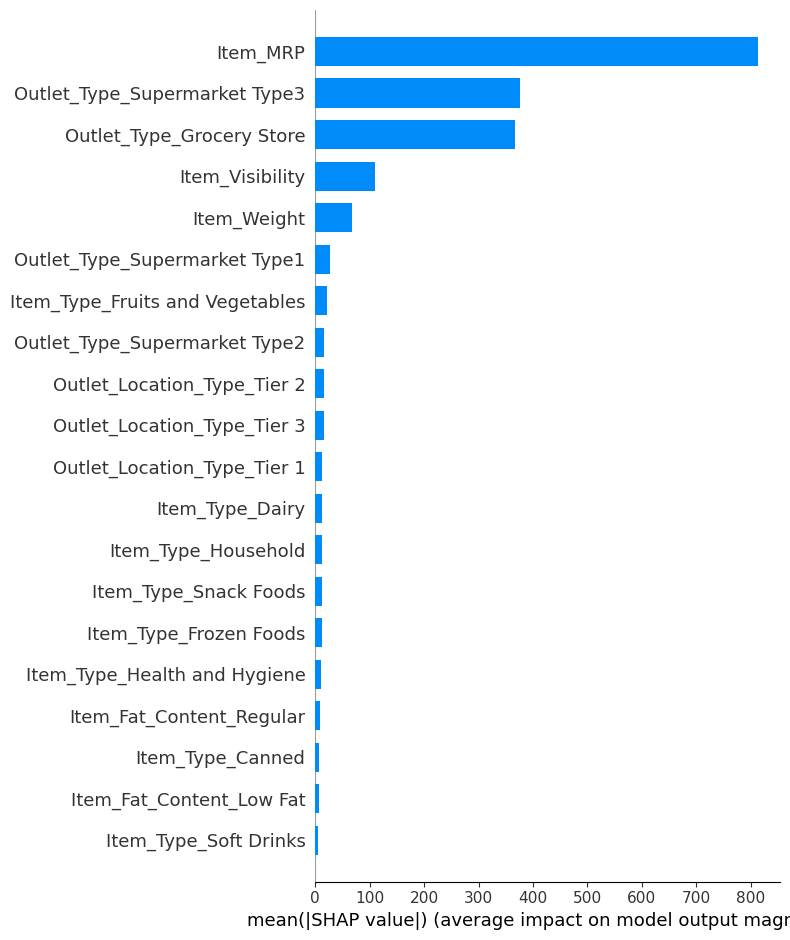

<Figure size 640x480 with 0 Axes>

In [65]:
# Create a summary plot
shap.summary_plot(shap_values, X_shap, plot_type='bar')

# Summary Plot - Bar Version

The bar summary plot shows the average magnitude of the SHAP values for each feature, providing a global view of feature importance. The y-axis shows the names of the features, and the x-axis represents the average absolute SHAP value, a measure of the magnitude of a feature's effect on the output. The larger the SHAP value, the higher the impact of the feature on the model's prediction.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


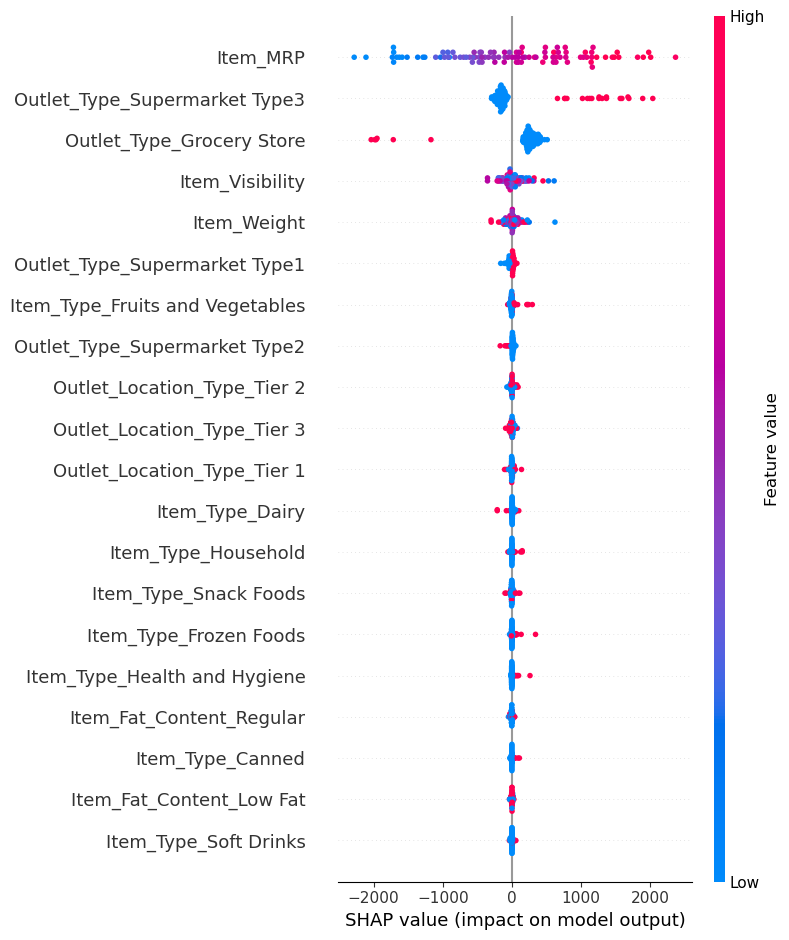

In [66]:
# Create a dot summary plot
shap.summary_plot(shap_values, X_shap, plot_type='dot')

# Summary Plot - Dot Version

The dot summary plot shows the SHAP values for individual data points, allowing us to understand how each feature influences individual predictions.

1. Item_MRP


Item MRP (Maximum Retail Price) is the first most important feature.


In the dot summary plot, we can examine the distribution of SHAP values for this feature. If the values are mostly positive, it indicates that higher MRP generally leads to higher predicted sales. If they are tightly clustered, the influence is consistent across different data points.


2. Outlet_Type_Supermarket Type3


Outlet Type: Supermarket Type3 is the second most important feature.


Look at the spread of SHAP values for this feature in the dot summary plot. If the values are mostly positive, it may indicate that this type of supermarket has a positive influence on predicted sales. The spread of the values can indicate whether this influence is consistent or varies.


3. Outlet_Type_Grocery Store


Outlet Type: Grocery Store is the third most important feature.


Similar to the previous feature, you can interpret its influence by examining the distribution of SHAP values in the dot summary plot. A mostly negative spread may indicate that this outlet type tends to lower predicted sales.


- Summary


These three features appear to have significant influence on the model's predictions:

- Item MRP: Likely has a strong and possibly consistent influence on sales predictions.


- Outlet Types: Different types of outlets (Supermarket Type3 and Grocery Store) may have distinct effects on sales predictions, reflecting the differences in shopping behavior at various types of stores.

# Local Explanations 

We will be selecting one examplee with low sales and one with high sales from our dataset. 

We're selecting these examples to understand the features that most heavily influence both ends of the sales spectrum. By analyzing a low-sales and a high-sales example, we can gain insights into what drives these extreme outcomes.

In [68]:
# Finding the index of the example with the lowest sales value
low_sales_index = np.argmin(y_train.values)

# Finding the index of the example with the highest sales value
high_sales_index = np.argmax(y_train.values)

# Extracting the examples with low and high sales
low_sales_example = X_train_no_scaling.iloc[low_sales_index]
high_sales_example = X_train_no_scaling.iloc[high_sales_index]

low_sales_index, high_sales_index, low_sales_example, high_sales_example

(4874,
 5073,
 Item_Weight                         9.50
 Item_Visibility                     0.00
 Item_MRP                           32.89
 Item_Fat_Content_Low Fat            1.00
 Item_Fat_Content_Regular            0.00
 Item_Type_Baking Goods              0.00
 Item_Type_Breads                    0.00
 Item_Type_Breakfast                 0.00
 Item_Type_Canned                    0.00
 Item_Type_Dairy                     0.00
 Item_Type_Frozen Foods              0.00
 Item_Type_Fruits and Vegetables     0.00
 Item_Type_Hard Drinks               0.00
 Item_Type_Health and Hygiene        0.00
 Item_Type_Household                 0.00
 Item_Type_Meat                      0.00
 Item_Type_Others                    0.00
 Item_Type_Seafood                   0.00
 Item_Type_Snack Foods               0.00
 Item_Type_Soft Drinks               1.00
 Item_Type_Starchy Foods             0.00
 Outlet_Location_Type_Tier 1         0.00
 Outlet_Location_Type_Tier 2         0.00
 Outlet_Location_Typ

# Lime Tabular Explanation

In [69]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [70]:
from lime.lime_tabular import LimeTabularExplainer

In [71]:
explainer_lime = LimeTabularExplainer(X_train_no_scaling.values, 
                                      feature_names=X_train_no_scaling.columns,
                                      class_names=['Sales'],
                                      mode='regression')

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


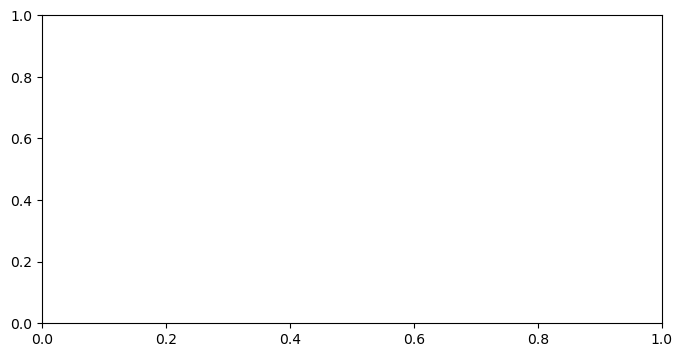

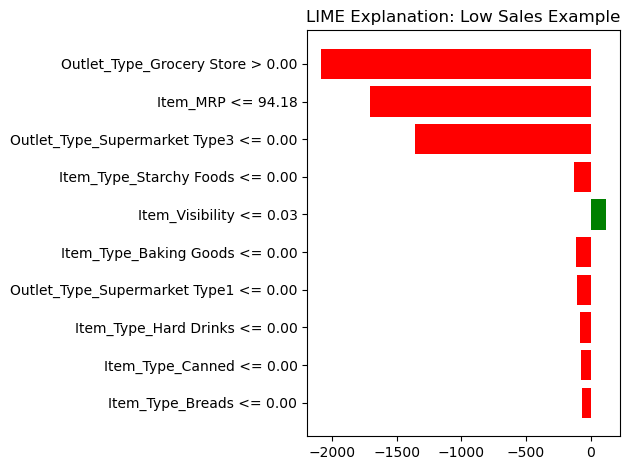

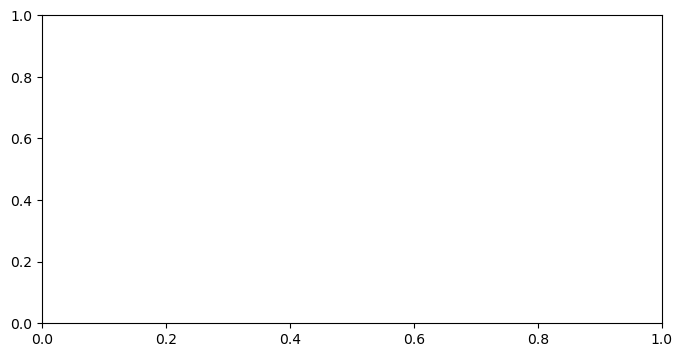

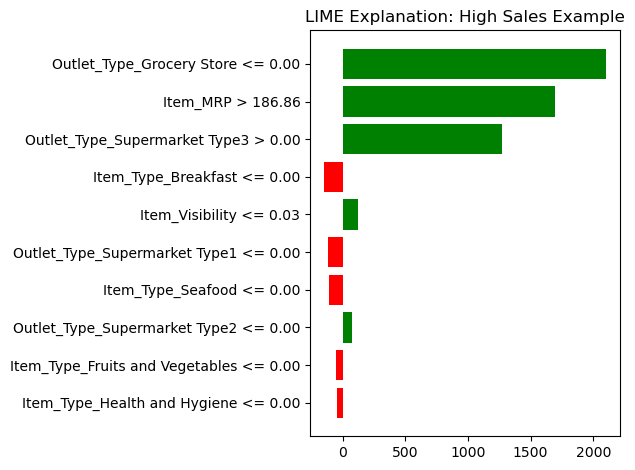

In [78]:
# Explain the low sales example
exp_low_sales = explainer_lime.explain_instance(low_sales_example.values, rfr.predict)

# Create a figure and axis to plot the explanation
fig, ax = plt.subplots(figsize=(8, 4))
exp_low_sales.as_pyplot_figure(ax)
plt.title('LIME Explanation: Low Sales Example')
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('lime_low_sales.png')

# Repeat for the high sales example
exp_high_sales = explainer_lime.explain_instance(high_sales_example.values, rfr.predict)
fig, ax = plt.subplots(figsize=(8, 4))
exp_high_sales.as_pyplot_figure(ax)
plt.title('LIME Explanation: High Sales Example')
plt.tight_layout()
plt.savefig('lime_high_sales.png')

## Interpretation LIME

1. Low Sales Example: Features with significant negative contributions, as these may be the factors leading to lower sales. Likewise, features with positive contributions might still be encouraging sales but are not enough to result in high sales.


2. High Sales Example: Features with positive contributions are likely driving the high sales in this example. Analyze how these features differ from those in the low sales example to understand what factors are most influential.

# Individual Force Plot (SHAP)

In [75]:
shap.initjs()

In [76]:
shap_values_low = explainer.shap_values(low_sales_example.values.reshape(1, -1))
shap_values_high = explainer.shap_values(high_sales_example.values.reshape(1, -1))

In [80]:
# Force plot for low sales example
shap.force_plot(explainer.expected_value, shap_values_low, low_sales_example)

# Force plot for high sales example
shap.force_plot(explainer.expected_value, shap_values_high, high_sales_example)

## Interpretation Individual Force Plots

1. Red vs. Blue: In a SHAP force plot, red features push the prediction higher, while blue features push it lower. You can analyze the balance between red and blue to understand what's driving the prediction.


2. Low Sales Example: Look for strong blue forces that might be pulling the prediction down, leading to low sales.


3. High Sales Example: Look for strong red forces that might be pushing the prediction up, leading to high sales.